In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

file_path = 'spot_updated.csv'
data = pd.read_csv(file_path)

data['datetime'] = pd.to_datetime(data['datetime'])

# Change the date time format
# df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

cols = ['datetime', 'BTCUSDT']
data = data[cols]

# Returns calculation
data['return_1h'] = data['BTCUSDT'].pct_change(periods=1)
data['return_1d'] = data['BTCUSDT'].pct_change(periods=24)
data['return_1w'] = data['BTCUSDT'].pct_change(periods=24*7)
data['return_2w'] = data['BTCUSDT'].pct_change(periods=24*7*2)
data['return_1m'] = data['BTCUSDT'].pct_change(periods=24*30)
data['return_3m'] = data['BTCUSDT'].pct_change(periods=24*30*3)
data['return_6m'] = data['BTCUSDT'].pct_change(periods=24*30*6)
data['return_12m'] = data['BTCUSDT'].pct_change(periods=24*30*12)

# Rolling Window
def rolling_corr(series1, series2, window):
    return series1.rolling(window).corr(series2)

# Correlation Calculation
data['rolling_corr_12m_1m'] = rolling_corr(data['return_12m'], data['return_1m'], 24 * 30 * 3)
data['rolling_corr_6m_1m'] = rolling_corr(data['return_6m'], data['return_1m'], 24 * 30 * 3)
data['rolling_corr_3m_1m'] = rolling_corr(data['return_3m'], data['return_1m'], 24 * 30 * 3)
data['rolling_corr_1m_1d'] = rolling_corr(data['return_1m'], data['return_1d'], 24 * 30 * 3)
data['rolling_corr_1w_1d'] = rolling_corr(data['return_1w'], data['return_1d'], 24 * 30 * 3)
data['rolling_corr_1d_1h'] = rolling_corr(data['return_1d'], data['return_1h'], 24 * 30 * 3)
data['rolling_corr_2w_1d'] = rolling_corr(data['return_2w'], data['return_1d'], 24 * 30 * 3)

data.to_csv('correlations_3m.csv')


In [55]:
columns = ['datetime',
           'rolling_corr_12m_1m',
           'rolling_corr_6m_1m',
           'rolling_corr_3m_1m',
           'rolling_corr_1m_1d',
           'rolling_corr_2w_1d',
           'rolling_corr_1w_1d',
           'rolling_corr_1d_1h']

corr = data[columns]

C:\Users\imcyr\AppData\Local\Temp\ipykernel_1304\905707903.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='rolling_corr_2w_1d')


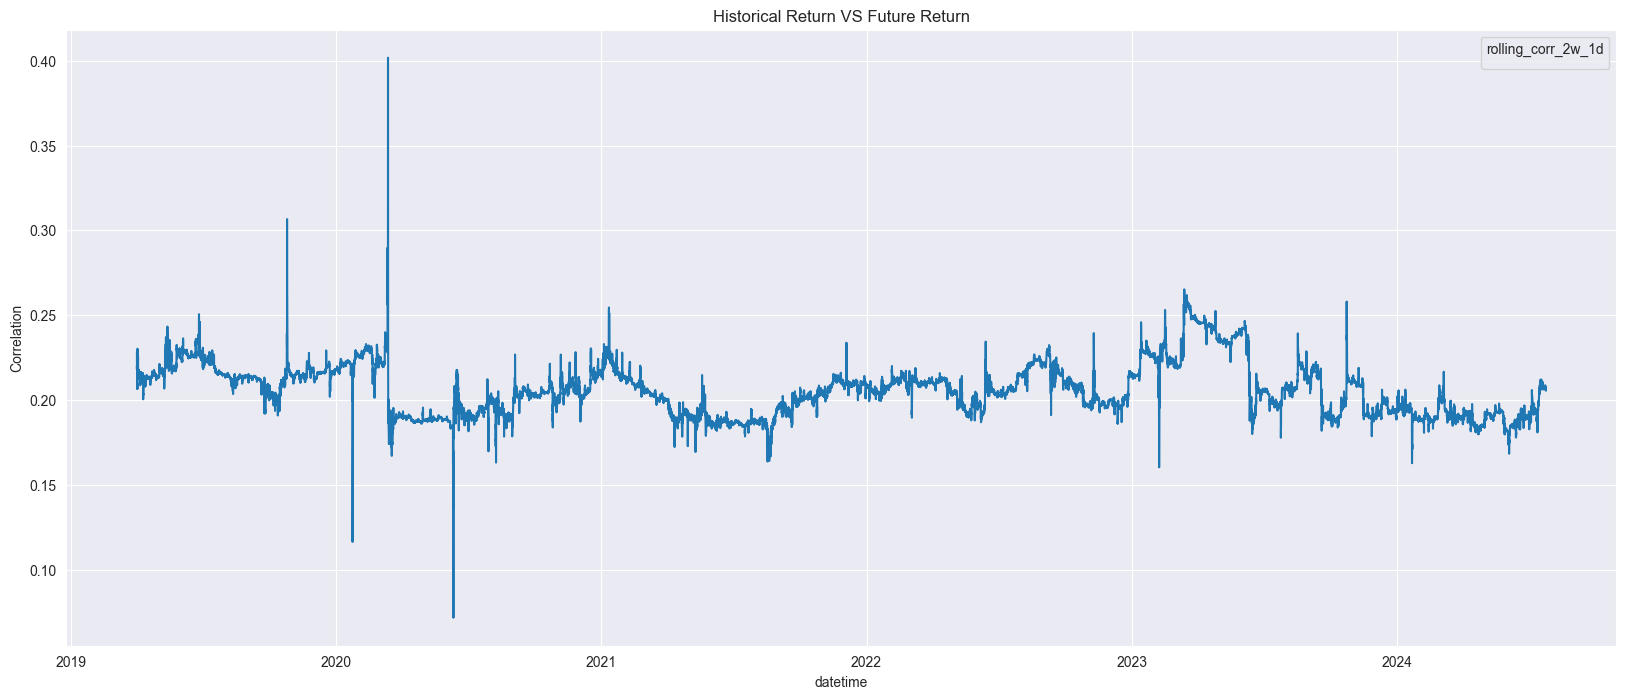

In [56]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=corr, x='datetime', y ='rolling_corr_1d_1h')
plt.title('Historical Return VS Future Return')
plt.ylabel('Correlation')
plt.legend(title='rolling_corr_2w_1d')
plt.show()

In [57]:
melted_corr = corr.melt(id_vars='datetime', var_name='Period', value_name='Correlation')

In [58]:
melted_corr.to_csv('melted_corr.csv')

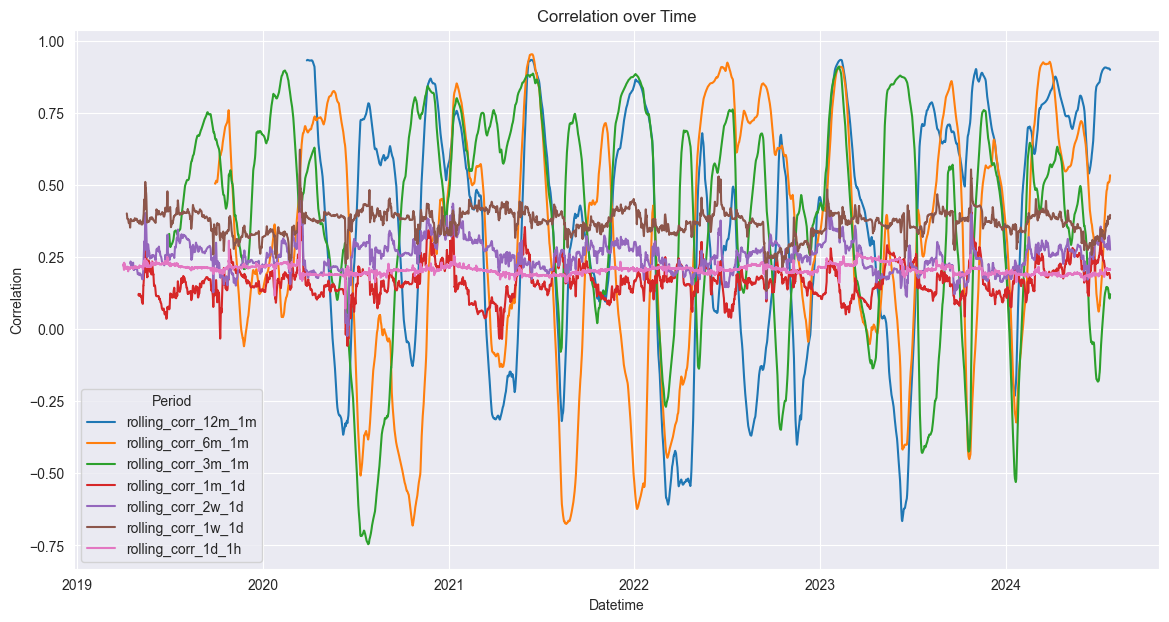

In [59]:

melted_corr['datetime'] = pd.to_datetime(melted_corr['datetime'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=melted_corr, x='datetime', y='Correlation', hue='Period')
plt.title('Correlation over Time')
plt.xlabel('Datetime')
plt.ylabel('Correlation')
plt.legend(title='Period')
plt.show()


In [ ]:
# data.set_index('datetime', inplace=True)  # For resample into quarter

C:\Users\imcyr\AppData\Local\Temp\ipykernel_1304\104826160.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_corr_df = data.resample('Q').mean()


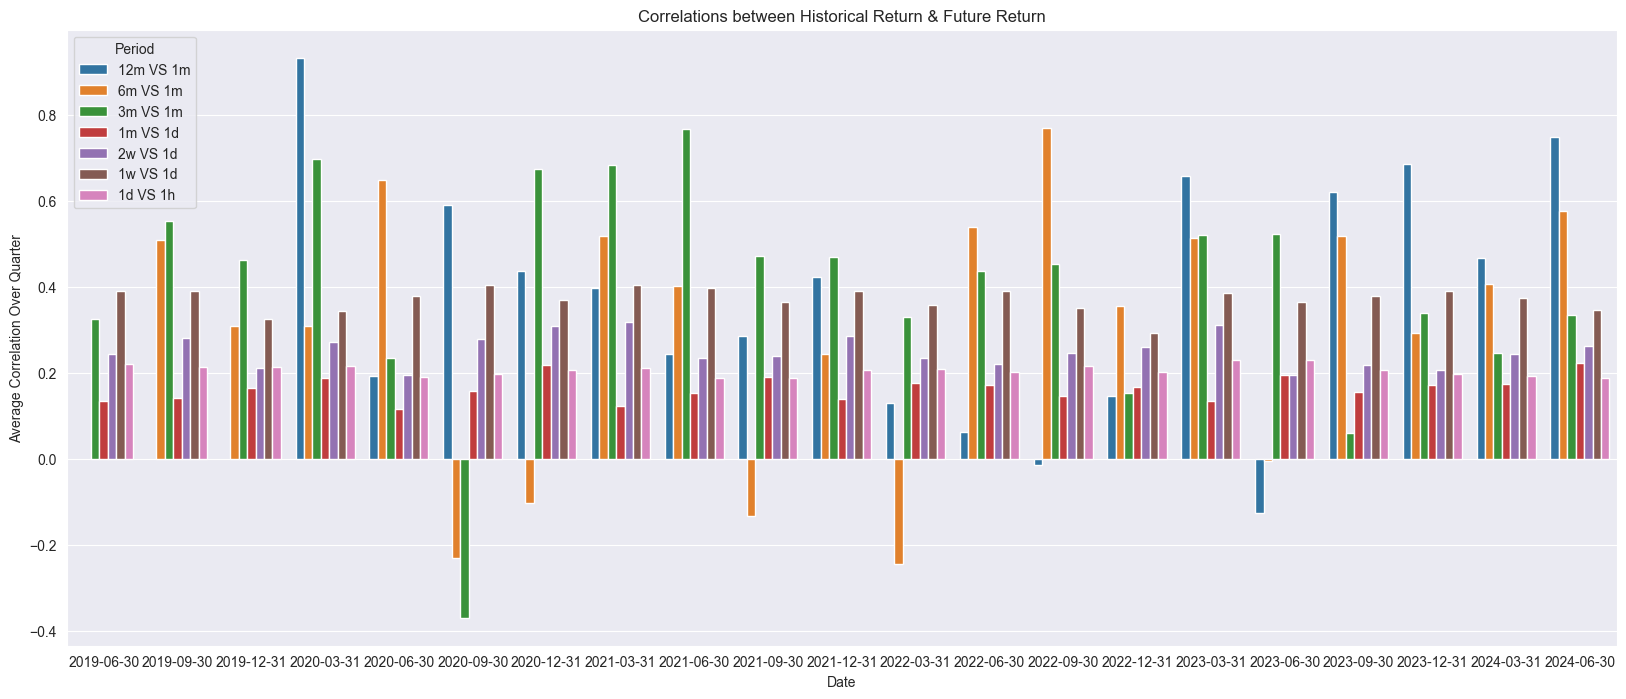

In [74]:
quarterly_corr_df = data.resample('Q').mean()

quarter_corr_df = quarterly_corr_df[['rolling_corr_12m_1m', 'rolling_corr_6m_1m', 'rolling_corr_3m_1m',
                                        'rolling_corr_1m_1d', 'rolling_corr_2w_1d','rolling_corr_1w_1d', 'rolling_corr_1d_1h']]

quarter_corr_df.columns = ['12m VS 1m', '6m VS 1m', '3m VS 1m', '1m VS 1d', '2w VS 1d','1w VS 1d', '1d VS 1h']
quarter_corr_df = quarter_corr_df.iloc[1:-1, :].reset_index()

melted_corr_df = quarter_corr_df.melt(id_vars='datetime', var_name='Period', value_name='Average Correlation')

plt.figure(figsize=(20, 8))
sns.barplot(data=melted_corr_df, x='datetime', y='Average Correlation', hue='Period')
plt.title('Correlations between Historical Return & Future Return')
plt.xlabel('Date')
plt.ylabel('Average Correlation Over Quarter')
plt.legend(title='Period')
plt.show()

In [73]:
import numpy as np

average_corr_12m_1m = data['rolling_corr_12m_1m'].mean()
average_corr_6m_1m = data['rolling_corr_6m_1m'].mean()
average_corr_3m_1m = data['rolling_corr_3m_1m'].mean()
average_corr_1m_1d = data['rolling_corr_1m_1d'].mean()
average_corr_2w_1d = data['rolling_corr_2w_1d'].mean()
average_corr_1w_1d = data['rolling_corr_1w_1d'].mean()
average_corr_1d_1h = data['rolling_corr_1d_1h'].mean()

std_corr_12m_1m = np.std(data['rolling_corr_12m_1m'])
std_corr_6m_1m = np.std(data['rolling_corr_6m_1m'])
std_corr_3m_1m = np.std(data['rolling_corr_3m_1m'])
std_corr_1m_1d = np.std(data['rolling_corr_1m_1d'])
std_corr_2w_1d = np.std(data['rolling_corr_2w_1d'])
std_corr_1w_1d = np.std(data['rolling_corr_1w_1d'])
std_corr_1d_1h = np.std(data['rolling_corr_1d_1h'])

average_corr_df = pd.DataFrame({
    'Period': ['12m VS 1m', '6m VS 1m', '3m VS 1m', '1m VS 1d', '2w VS 1d', '1w VS 1d', '1d VS 1h'],
    'Average Correlation': [average_corr_12m_1m, average_corr_6m_1m, average_corr_3m_1m, average_corr_1m_1d, average_corr_2w_1d, average_corr_1w_1d, average_corr_1d_1h],
    'Standard Deviation': [std_corr_12m_1m, std_corr_6m_1m, std_corr_3m_1m, std_corr_1m_1d, std_corr_1w_1d, std_corr_2w_1d, std_corr_1d_1h]
})
average_corr_df

,Period,Average Correlation,Standard Deviation
0,12m VS 1m,0.359845,0.422841
1,6m VS 1m,0.299635,0.426571
2,3m VS 1m,0.396921,0.375957
3,1m VS 1d,0.165342,0.058076
4,2w VS 1d,0.251465,0.042964
5,1w VS 1d,0.370529,0.052319
6,1d VS 1h,0.205955,0.015050
